# Correlating small-cap pharmaceutical drug companies' stock prices with the FDA drug approval process
CS 198-134: Introduction to Quantitative Finance Final Project

Presented by Cyprian Zander, Enmanual Felix Pena, Jeet Sandhu, Pranay Rajpaul, Shangdian Han

## Abstract

The pharmaceutical industry is a crucial sector of the global economy that plays a significant role in advancing healthcare and treating illnesses. The industry's growth and sustainability can be attributed to a steady stream of new drugs and therapies that address a range of diseases and health conditions. However, bringing a new drug to market is a complex and costly process that takes an average of 10-15 years and can cost over $1 billion in research and development. Moreover, the vast majority of drugs fail in the early testing phases, never making it past the preliminary stages and into clinical testing. As a result, significant financial resources must continually be invested in the process of developing new drugs and therapies. This investment is essential for companies to maintain a competitive edge in the industry and to stay ahead of the curve in terms of innovation and discovery.

Pharmaceutical companies, especially smaller ones, are known to have highly volatile stock prices due to a variety of factors. Since the development of new drugs and therapies is a complex and costly process, it is subject to a range of uncertainties, including regulatory hurdles, clinical trial results, and patent expirations. As a result, the stock prices of these companies can be highly sensitive to changes in market sentiment and news related to drug development and approval processes.

Recognizing trends in price fluctuations in pharmaceutical companies could yield a high Sharpe ratio trading strategy. This is because these companies often experience significant price swings in response to news related to their drug development pipelines, clinical trial results, and FDA drug approvals. By identifying patterns in these price movements, investors could potentially develop a trading strategy that generates good returns with low risk.

For example, one significant determinant of price changes in pharmaceutical companies is the FDA drug approval process. The FDA is responsible for evaluating the safety and efficacy of new drugs before they can be marketed and sold to the public. The approval process can have a significant impact on a pharmaceutical company's stock price. If the FDA approves a new drug, it can lead to a significant increase in a company's stock price, as investors perceive the approval as a sign of the drug's potential commercial success. Conversely, if the FDA rejects a new drug, it can lead to a significant decline in a company's stock price, as investors perceive the rejection as a sign of the drug's potential commercial failure.

The highly volatile stock prices of pharmaceutical companies could lead to high Sharpe ratios for specific trading strategies. For instance, a trading strategy that takes advantage of the price movements before and after an FDA drug approval could potentially generate high returns with relatively low risk. By buying the stock before the FDA approval and selling it shortly after the approval, traders could potentially capture the price increase and earn a profit. Similarly, by shorting the stock before the FDA rejection and covering the position after the rejection, traders could potentially capture the price decline and earn a profit.

This report will address how analyzing and leveraging the news on FDA drug approvals for small-cap pharmaceutical companies can be an effective way to maximize the Sharpe ratio for trading strategies involving pharmaceutical companies. 

Our data will be based on drug approvals from January, 2018 to December 2022.

## Research

##### FDA Drug Approval Process

To understand the observations we are tracing to stock price, a general understanding of the full FDA approval process is necessary. This research is taken from drugwatch.com and the fda.gov website.

https://www.drugwatch.com/fda/approval-process/

https://www.fda.gov/patients/drug-development-process/step-3-clinical-research

<br />When wanting to bring a new drug to market, companies must file a **New Drug Application, or NDA**.

**Incentive for pharmaceutical company**
<br />A new patent is good for 20 years from the date the application is filed in the U.S.

**Expedited review process**
<br />Prescription Drug User Fee Act (PDUFA) allows the FDA to collect fees from companies to expedite the drug-approval process.
<br />Standard Review: Drug approval within 10 months.
<br />Priority Review: Drug approval within 6 months.

**Reasons for denying approval**
<br />Unexpected safety issues, manufacturing issues or a failure to prove a drug’s effectiveness.

**The drug approval process**
<br />Basic safety of drug is tested through chemical tests and animal tests.
<br />Clinical trials consist of 3 phases.

1. Phase 1
    - Length: Several months
    - Participants: 20 to 100 healhy volunteers / people with disease
    - Selectivity: 70% pass
    - Intention: Test how drug interacts with human body, adjusting human dosage based on animal data, find out how much body can tolerate and acute side effects, how to best administer the drug to limit risks and maximize benefits
    
    
2. Phase 2
    - Length: Several months to 2 years 
    - Participants: Several hundred people with disease
    - Selectivity: 33% pass
    - Intention: Establish research questions, research methods, and design P3 research protocols, provide additional safety data. Note: this study is still not large enough to show whether drug will help treat the target condition


3. Phase 3
    - Length: 1 to 4 years
    - Participants: 300 to 3000
    - Selectivity: 25-30% pass
    - Intention: Test if it offers a treatment benefit to a specific population, "Pivotal studies", provides most safety data - reveals long term or rare side effects

Passing of phase 3 means FDA approval is given and the drug is released to the market.

4. Phase 4
    - Several thousand volunteers
    - Carried out once drug approved by FDA in _Post Market Safety Monitoring_

**Notes**
<br />Medical Devices have Class I, II, III based on how invasive they are - Pharmaceutical companies are allowed to announce devices before approval process.


As can be seen, the most pivotal stage of the FDA approval process is phase 3, as this approval is followed by bringing the drugs to market and is tje most selective and long process.

## Method

Testing this hypothesis can be broken into the following steps:

1. Collecting small cap pharmaceutical company tickers: find all indexed pharmaceutical stocks, filter by market cap
2. Collect each stock's FDA drug approval history
3. Data Cleaning
4. Collect price change data: 1mo at 1hr intervals of stock data following news
5. Analysis: Compare stock performance following news vs. performance of same time frame drawing from a random sample of ticker price history

### Importing Libraries

In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import nltk
nltk.download('punkt')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cyprianzander/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1. Collecting small cap pharmaceutical company tickers

Nasdaq's stock screener (https://www.nasdaq.com/market-activity/stocks/screener) enables filtering of stocks by exchange, market cap, analyst rating, sector, region, and country. We collect tickers from NYSE, NASDAQ, and AMEX by filtering out stocks with market cap > $10B, as these stocks would no longer be considered "small cap", thus falling outside of the parameters of our hypothesis and searching by sector: "Healthcare".

The prepared CSV file now contains 1200 observations, but these also need to be filtered by industry ("Biotechnology: Pharmaceutical Preparations"), as this industry focusses on pharmaceutical drug preparation.

In [44]:
healthcare_stocks = pd.read_csv("nasdaq_screener_1683316923031.csv")

pharmaceutical_preparations = healthcare_stocks.loc[healthcare_stocks["Industry"] == "Biotechnology: Pharmaceutical Preparations"] # Filter by Industry
pharmaceutical_preparations.head(15)
print("pharmaceutical_preparations contains", len(pharmaceutical_preparations.index), "tickers.")


,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AADI,Aadi Bioscience Inc. Common Stock,$7.94,0.1600,2.057%,1.940297e+08,United States,NaN,46995,Health Care,Biotechnology: Pharmaceutical Preparations
3,ABEO,Abeona Therapeutics Inc. Common Stock,$3.32,0.0600,1.84%,5.919898e+07,United States,NaN,104342,Health Care,Biotechnology: Pharmaceutical Preparations
5,ABOS,Acumen Pharmaceuticals Inc. Common Stock,$5.1675,1.1175,27.593%,2.119970e+08,United States,2021.0,1167028,Health Care,Biotechnology: Pharmaceutical Preparations
6,ABSI,Absci Corporation Common Stock,$1.40,0.0900,6.87%,1.293529e+08,United States,2021.0,519172,Health Care,Biotechnology: Pharmaceutical Preparations
8,ABVC,ABVC BioPharma Inc. Common Stock,$0.80,0.0500,6.667%,2.646459e+07,United States,NaN,36071,Health Care,Biotechnology: Pharmaceutical Preparations
9,ACAD,ACADIA Pharmaceuticals Inc. Common Stock,$21.97,0.4200,1.949%,3.564197e+09,United States,1985.0,709500,Health Care,Biotechnology: Pharmaceutical Preparations
11,ACER,Acer Therapeutics Inc. Common Stock (DE),$0.7625,0.0065,0.86%,1.785892e+07,United States,NaN,224730,Health Care,Biotechnology: Pharmaceutical Preparations
12,ACET,Adicet Bio Inc. Common Stock,$6.45,0.0700,1.097%,1.263544e+08,United States,2018.0,109847,Health Care,Biotechnology: Pharmaceutical Preparations
17,ACIU,AC Immune SA Common Stock,$2.07,0.0100,0.485%,1.730942e+08,Switzerland,2016.0,158640,Health Care,Biotechnology: Pharmaceutical Preparations
18,ACLX,Arcellx Inc. Common Stock,$44.01,0.7500,1.734%,2.105455e+09,United States,2022.0,385064,Health Care,Biotechnology: Pharmaceutical Preparations


pharmaceutical_preparations contains 619 tickers.



### 2. Collect each stock's FDA drug approval history

Having collected all 619 small-cap pharmaceutical preparation stock tickers, the data to correlate these stocks by is their FDA approval history. 

From the FDA website, we use the past 10 years of drug approval data (see https://www.fda.gov/drugs/development-approval-process-drugs/drug-approvals-and-databases) and match these with our ticker symbols and name collected previously. This requires some data cleaning, as the FDA data has company name abbreviations that do not match the company symbol or name from pharmaceutical_preparations.

Data can only be collected on a by-month basis, thus the data loading is a bit more sophisticated.

Notable about this data is that it does not include phase 1, phase 2, and phase 3 distinctions, but rather only phase 3 approved drugs. An extension to this project could be finding / generating a more rigorous database that also tracks phase 1 and phase 2 approvals.

In [97]:
start_year_incl = 18 # 2022
end_year_excl = 23 # 2023

all_FDA_approvals = pd.DataFrame()

for i in range(start_year_incl, end_year_excl): # year
    for j in range(1, 13): # month
        current_month_FDA = pd.read_csv("./FDA_approvals/%02d%02d.csv" % (j,i,)) #gather data
        all_FDA_approvals = pd.concat([all_FDA_approvals, current_month_FDA], axis=0)

all_FDA_approvals.head(15)
print("all_FDA_approvals contains", len(all_FDA_approvals.index), "drug approvals.")

,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification *,Submission Status
0,01/02/2018,EXCEDRIN (MIGRAINE RELIEF)NDA #020802,SUPPL-32,ACETAMINOPHEN; ASPIRIN; CAFFEINE,GLAXOSMITHKLINE CONS,Labeling,Approval
1,01/02/2018,DOXYCYCLINE HYCLATEANDA #062031,SUPPL-79,DOXYCYCLINE HYCLATE,ACTAVIS LABS FL INC,Labeling,Approval
2,01/02/2018,DOXYCYCLINE HYCLATEANDA #062031,SUPPL-80,DOXYCYCLINE HYCLATE,ACTAVIS LABS FL INC,Labeling,Approval
3,01/02/2018,DOXYCYCLINE HYCLATEANDA #062421,SUPPL-62,DOXYCYCLINE HYCLATE,ACTAVIS LABS FL INC,Labeling,Approval
4,01/02/2018,DOXYCYCLINE HYCLATEANDA #062421,SUPPL-67,DOXYCYCLINE HYCLATE,ACTAVIS LABS FL INC,Labeling,Approval
5,01/02/2018,DOXYCYCLINE HYCLATEANDA #062421,SUPPL-68,DOXYCYCLINE HYCLATE,ACTAVIS LABS FL INC,Labeling,Approval
6,01/02/2018,INVOKAMET XRNDA #205879,SUPPL-2,CANAGLIFLOZIN; METFORMIN HYDROCHLORIDE,JANSSEN PHARMS,Efficacy,Approval
7,01/03/2018,TROKENDI XRNDA #201635,SUPPL-18,TOPIRAMATE,SUPERNUS PHARMS,Labeling,Approval
8,01/04/2018,PARNATENDA #012342,SUPPL-64,TRANYLCYPROMINE SULFATE,CONCORDIA,Labeling,Approval
9,01/04/2018,NOXAFILNDA #022003,SUPPL-22,POSACONAZOLE,SCHERING,Labeling,Approval


all_FDA_approvals contains 24419 drug approvals.


### 3. Data cleaning and preparation

We take the following data cleaning steps:

1. Lowercasing entries
2. Tokenizing company name
3. Removing unnecessary columns
4. Removing common company phrases to avoid mismatch
5. Matching stock symbol & name from `pharmaceutical_preparations` with events from `all_FDA_approvals`

In [98]:
#1
all_FDA_approvals = all_FDA_approvals.applymap(lambda s: s.lower() if type(s) == str else s) # lowercase all data
pharmaceutical_preparations = pharmaceutical_preparations.applymap(lambda s: s.lower() if type(s) == str else s) # lowercase all data

#2
all_FDA_approvals['Company Token'] = all_FDA_approvals.apply(lambda row: nltk.word_tokenize(row['Company']), axis=1) # tokenize company name for matching with pharmaceutical_preparations table
pharmaceutical_preparations['Company Token'] = pharmaceutical_preparations.apply(lambda row: nltk.word_tokenize(row['Name']), axis=1) # same for pharmaceutical_preparations

#3
pharma_symbols = pharmaceutical_preparations[["Symbol", "Name", "Company Token", "Market Cap", "Country"]]
FDA_approvals_short = all_FDA_approvals[["Approval Date", "Company Token", "Submission", "Active Ingredients", "Submission Classification *", "Submission Status"]] # remove unecessary columns

#4
common_words_list = ["hlthcare", "inc", "pharms", "industries", "sciences", "pharm", "pharma", "ltd", "llc", "corp", "labs", "dr", "prods", "usa", "laboratories", \
                    "biopharma", "grp", "biotech", "us", "sciences", "health", "global", "branded", "pte", "co", "iii", "ii", "iv", "v", "vi", "sa", "sas", "pvt", "lp" \
                    "ab", "and", "speclts", "products", "sterile", "common", "stock", "inc", "bio", "biopharma", "therapeutics", "american", "technologies", "corp", "plc", \
                    "ordinary", "shares", "corporation", "pharmaceuticals", "dna", "incorporated", "biosciences", "warrant", "biotherapeutics", "health", "class", "a", \
                    "b", "shs", "ltd", "medical", "holdings", "medicines", "depositary", "limited", "antibodies", "sciences", "incorporated", "group", "research", "&", "co", \
                    "financial", "life", "holding", "series", "systems", "biopharm", "diabetes", "bioscience", "physical", "therapy", "ltd.", "llc.", "u.s.a.", "u.s.", "inc.", \
                    "(", ")", "immune", "warrants", "oncology", "biomedica", "corp.", "n.v.", "delaware", "companies", "fusion", "share", "euro", "israel", "sponsored", \
                    "technology", "pharmaceutical", "de", "convertible", "preferred", "biopharmaceuticals", "medicine", "biosolutions", "animal", 'cumulative', 'redeemable', \
                    'perpetual', "co.", "lifesciences", "china", "ireland", "biotechnology", "immunopharma", "biotechnology", "immunotherapeutics", "lifesciences", "biomed", \
                    "company", "neurosciences", "biomediacal", "biomedical", "ag", "healthcare", "consumer", "precision", "canada", "international", "nv", "depository", "intl", \
                    "r", "d", "farmaceutica", "medcl", "therap", "theraps", "molecular", "womens", "solutions", "steriscience", "ny", "lp", "india", "uk", "humanwell", "medicare" \
                    "int", "critical", "sharp", "int", "kabi", "teva", ",", "ventures", "injectables", "aps", "n.v", "s.a", "therapies"] # filter company tokens by these common words
FDA_approvals_short["Company Token"] = FDA_approvals_short["Company Token"].apply(lambda x: [item for item in x if item not in common_words_list])
pharma_symbols["Company Token"] = pharma_symbols["Company Token"].apply(lambda x: [item for item in x if item not in common_words_list])


FDA_approvals_short.head(15)
pharma_symbols.head(15)

FDA_approvals_short.to_csv('FDA_approvals_short.csv')
pharma_symbols.to_csv('pharma_symbols.csv')

/var/folders/qq/q9njxf715r5_sygj6w0kh68h0000gn/T/ipykernel_58987/3105478115.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FDA_approvals_short["Company Token"] = FDA_approvals_short["Company Token"].apply(lambda x: [item for item in x if item not in common_words_list])
/var/folders/qq/q9njxf715r5_sygj6w0kh68h0000gn/T/ipykernel_58987/3105478115.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharma_symbols["Company Token"] = pharma_symbols["Company Token"].apply(lambda x: [item for item in x if it

,Approval Date,Company Token,Submission,Active Ingredients,Submission Classification *,Submission Status
0,01/02/2018,"[glaxosmithkline, cons]",suppl-32,acetaminophen; aspirin; caffeine,labeling,approval
1,01/02/2018,"[actavis, fl]",suppl-79,doxycycline hyclate,labeling,approval
2,01/02/2018,"[actavis, fl]",suppl-80,doxycycline hyclate,labeling,approval
3,01/02/2018,"[actavis, fl]",suppl-62,doxycycline hyclate,labeling,approval
4,01/02/2018,"[actavis, fl]",suppl-67,doxycycline hyclate,labeling,approval
5,01/02/2018,"[actavis, fl]",suppl-68,doxycycline hyclate,labeling,approval
6,01/02/2018,[janssen],suppl-2,canagliflozin; metformin hydrochloride,efficacy,approval
7,01/03/2018,[supernus],suppl-18,topiramate,labeling,approval
8,01/04/2018,[concordia],suppl-64,tranylcypromine sulfate,labeling,approval
9,01/04/2018,[schering],suppl-22,posaconazole,labeling,approval


,Symbol,Name,Company Token,Market Cap,Country
0,aadi,aadi bioscience inc. common stock,[aadi],1.940297e+08,united states
3,abeo,abeona therapeutics inc. common stock,[abeona],5.919898e+07,united states
5,abos,acumen pharmaceuticals inc. common stock,[acumen],2.119970e+08,united states
6,absi,absci corporation common stock,[absci],1.293529e+08,united states
8,abvc,abvc biopharma inc. common stock,[abvc],2.646459e+07,united states
9,acad,acadia pharmaceuticals inc. common stock,[acadia],3.564197e+09,united states
11,acer,acer therapeutics inc. common stock (de),[acer],1.785892e+07,united states
12,acet,adicet bio inc. common stock,[adicet],1.263544e+08,united states
17,aciu,ac immune sa common stock,[ac],1.730942e+08,switzerland
18,aclx,arcellx inc. common stock,[arcellx],2.105455e+09,united states


As can be seen, the data cleaning, especially with regards to cleaning company share names from the ticker dataframe to be merged with FDA's shortcut names, works very well.

Information is compressed only to relevant analysis data and company name cleaning works very well because of pharmaceutical company's very distinct names, allowing for quite effective merging using just the first company token from both dataframes.

In [99]:
#5
pharma_symbols = pharma_symbols[pharma_symbols['Company Token'].apply(lambda x: bool(x))] # remove empty company tokens
pharma_symbols['Company Token'] = pharma_symbols['Company Token'].apply(lambda x: x[0]) # take the first element of company tokens
pharma_symbols = pharma_symbols.reset_index(drop=True)
pharma_symbols['Company Token'] = pharma_symbols['Company Token'].astype(str)

FDA_approvals_short = FDA_approvals_short[FDA_approvals_short['Company Token'].apply(lambda x: bool(x))]
FDA_approvals_short['Company Token'] = FDA_approvals_short['Company Token'].apply(lambda x: x[0])
FDA_approvals_short = FDA_approvals_short.reset_index(drop=True)
FDA_approvals_short['Company Token'] = FDA_approvals_short['Company Token'].astype(str)

symbols_FDA = pd.merge(FDA_approvals_short, pharma_symbols, on='Company Token', how='inner', suffixes=("_tic", "_fda"))
symbols_FDA.head()
print("symbols_FDA contains", len(symbols_FDA.index), "observations.")


,Approval Date,Company Token,Submission,Active Ingredients,Submission Classification *,Submission Status,Symbol,Name,Market Cap,Country
0,01/03/2018,supernus,suppl-18,topiramate,labeling,approval,supn,supernus pharmaceuticals inc. common stock,1.996176e+09,united states
1,12/13/2018,supernus,suppl-10,oxcarbazepine,efficacy,approval,supn,supernus pharmaceuticals inc. common stock,1.996176e+09,united states
2,02/21/2019,supernus,suppl-20,topiramate,labeling,approval,supn,supernus pharmaceuticals inc. common stock,1.996176e+09,united states
3,11/18/2020,supernus,suppl-25,topiramate,labeling,approval,supn,supernus pharmaceuticals inc. common stock,1.996176e+09,united states
4,04/02/2021,supernus,orig-1,viloxazine hydrochloride,type 1 - new molecular entity,approval,supn,supernus pharmaceuticals inc. common stock,1.996176e+09,united states


symbols_FDA contains 1626 observations.


This is the final cleaned data table. As can be seen, the number of observations has decreased significantly from the original drug approval data. This can be explained mainly because we're dealing with small-cap pharmaceuticals, which release drugs at much lower rates than big pharma companies. Of course, a few lost observations or untracked ones was likely caused by the data cleaning and preparation process. 

### 4. Collecting Price Change Data

Have collected all FDA phase 3 drug approvals and matched them to their respective stocks, the leading and trailing stock values are to be found for each observation. This data is gathered using yfinance.

Text(0.5, 1.0, 'SUPN from 2018-02-01 to 2018-04-01')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: title={'center': 'SUPN from 2018-02-01 to 2018-04-01'}, xlabel='Date'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price (USD)')

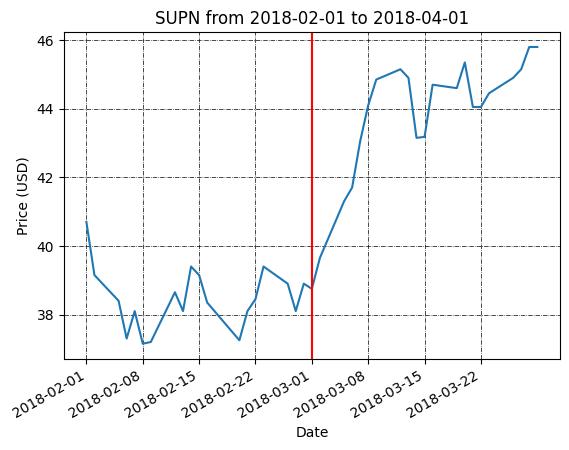

In [119]:
start_date = '2018-02-01'
end_date = '2018-04-01'
observation_date = '2018-03-01'
ticker = "supn"

plt.title("{} from {} to {}".format(ticker.upper(), start_date, end_date))
data = yf.download(ticker,start_date, end_date)
data['Adj Close'].plot()
plt.axvline(x=observation_date, color='r', label="Approval")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

 Here is a sample plot of the yfinance collected data. One leading and one trailing month will be collected for each FDA approval observation. For this example, we take the first observation in the sample (supn) and mark the date of the observation by the red line, which may suggest very promising results in the efficacy of this hypothesis.

## Analysis and Conclusion

_Write text on how to perform analysis_

## Bibliography

https://www.fda.gov/drugs/development-approval-process-drugs/drug-approvals-and-databases

https://www.nasdaq.com/market-activity/stocks/screener

https://www.drugwatch.com/fda/approval-process/

https://www.fda.gov/patients/drug-development-process/step-3-clinical-research